In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gender = pd.read_csv("gender.csv")

In [4]:
gender

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [6]:
x = gender.drop(['gender'], axis=1).values
y = gender['gender'].values


In [7]:
print(x)

[[ 1.  11.8  6.1 ...  0.   1.   1. ]
 [ 0.  14.   5.4 ...  0.   1.   0. ]
 [ 0.  11.8  6.3 ...  1.   1.   1. ]
 ...
 [ 1.  12.9  5.7 ...  0.   0.   0. ]
 [ 1.  13.2  6.2 ...  0.   0.   0. ]
 [ 1.  15.4  5.4 ...  1.   1.   1. ]]


In [8]:
print(y)

['Male' 'Female' 'Male' ... 'Female' 'Female' 'Male']


In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)
kf = KFold(n_splits= 6 , random_state=44 , shuffle = True)
print(kf)

KFold(n_splits=6, random_state=44, shuffle=True)


In [10]:
print(x_train.shape)

(4000, 7)


In [11]:
print(x_test.shape)

(1001, 7)


In [12]:
print(x.shape)

(5001, 7)


In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy='mean')
imputer.fit(x[: , 0:7])
x[: , 0:7] = imputer.transform(x[: , 0:7])
print(x.shape)

(5001, 7)


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender['gender'] = label_encoder.fit_transform(gender['gender'])
gender

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [15]:
x = gender.drop(columns='gender' , axis=1).values
y = gender['gender'].values

In [16]:
x

array([[ 1. , 11.8,  6.1, ...,  0. ,  1. ,  1. ],
       [ 0. , 14. ,  5.4, ...,  0. ,  1. ,  0. ],
       [ 0. , 11.8,  6.3, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 12.9,  5.7, ...,  0. ,  0. ,  0. ],
       [ 1. , 13.2,  6.2, ...,  0. ,  0. ,  0. ],
       [ 1. , 15.4,  5.4, ...,  1. ,  1. ,  1. ]])

In [17]:
y

array([1, 0, 1, ..., 0, 0, 1])

In [39]:
gender = gender.astype(int)
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)
kf = KFold(n_splits= 6 , random_state=44 , shuffle = True)
print(kf)

KFold(n_splits=6, random_state=44, shuffle=True)


In [40]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)

(4000, 7)
(1001, 7)
(5001, 7)


In [41]:
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [42]:
reg.score(x_test, y_test)

0.8323674916343946

In [43]:
y_pred = reg.predict(x_train)

In [44]:
train_score=reg.score(x_train , y_train)
print(train_score)

0.8447652675346693


In [45]:
reg = LinearRegression()
cv_results = cross_val_score(reg , x, y,cv=kf)
print(np.mean(cv_results))

0.8410877703570373


In [46]:
print(np.std(cv_results))

0.008185400126490595


In [47]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [48]:
x_train

array([[ 0.38484494,  1.99684971,  1.2022527 , ...,  0.98708341,
         1.01867434,  0.9965061 ],
       [ 0.38484494, -0.8848672 , -1.38383285, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [-2.59844915, -1.51524277, -0.27551047, ..., -1.01308561,
        -0.981668  , -1.00350615],
       ...,
       [ 0.38484494, -1.06497451, -0.09079008, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [ 0.38484494, -0.34454528, -1.01439206, ..., -1.01308561,
        -0.981668  , -1.00350615],
       [ 0.38484494, -1.60529643, -0.82967166, ..., -1.01308561,
        -0.981668  , -1.00350615]])

In [49]:
x_test

array([[ 0.39651662,  0.02101839, -0.43472994, ...,  0.97338113,
         0.99501741,  1.02529484],
       [ 0.39651662,  0.47839694,  0.12032704, ..., -1.02734682,
        -1.00500754, -0.9753292 ],
       [-2.52196235, -0.25340873, -1.1748059 , ..., -1.02734682,
        -1.00500754,  1.02529484],
       ...,
       [ 0.39651662,  1.0272512 , -0.43472994, ..., -1.02734682,
        -1.00500754, -0.9753292 ],
       [ 0.39651662,  0.66134836,  0.67538401, ...,  0.97338113,
         0.99501741,  1.02529484],
       [ 0.39651662, -0.16193302, -0.98978691, ...,  0.97338113,
        -1.00500754,  1.02529484]])

In [50]:
reg.fit(x_test , y_test)
y_pred = reg.predict(x_test)
test_score = reg.score(x_test , y_test)

In [51]:
test_score

0.8377495486548829

In [52]:
from sklearn.linear_model import Ridge

# Create Ridge Regression model
ridge = Ridge(alpha=1.0 , random_state= 40)  # Alpha is the regularization parameter

ridge.fit(x_train, y_train)
train_score = ridge.score(x_train , y_train )
test_score = ridge.score(x_test , y_test)

In [53]:
train_score

0.8447652603870017

In [54]:
y_pred_ridge = ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [55]:
mse_ridge

0.04191142680179597

In [56]:
input_data = (0, 8 , 5, 4 , 1, 0, 1)
input_data  = np.asarray(input_data)
input_data_reshape = input_data.reshape(1 , -1)
prediction = reg.predict(input_data_reshape)
print("the gender is :" , prediction[0])

the gender is : 1.6421865551803578


In [57]:
from sklearn.neighbors import KNeighborsRegressor
steps = [('scaler' , StandardScaler()),('knn', KNeighborsRegressor(n_neighbors=6))]
pipeline = Pipeline(steps)
knn_scaled = pipeline.fit(x_train , y_train)
y_pred = knn_scaled.predict(x_test)
print(knn_scaled.score(x_test,y_test))

0.8904419063891396


array([[<Axes: title={'center': 'long_hair'}>,
        <Axes: title={'center': 'forehead_width_cm'}>,
        <Axes: title={'center': 'forehead_height_cm'}>],
       [<Axes: title={'center': 'nose_wide'}>,
        <Axes: title={'center': 'nose_long'}>,
        <Axes: title={'center': 'lips_thin'}>],
       [<Axes: title={'center': 'distance_nose_to_lip_long'}>,
        <Axes: title={'center': 'gender'}>, <Axes: >]], dtype=object)

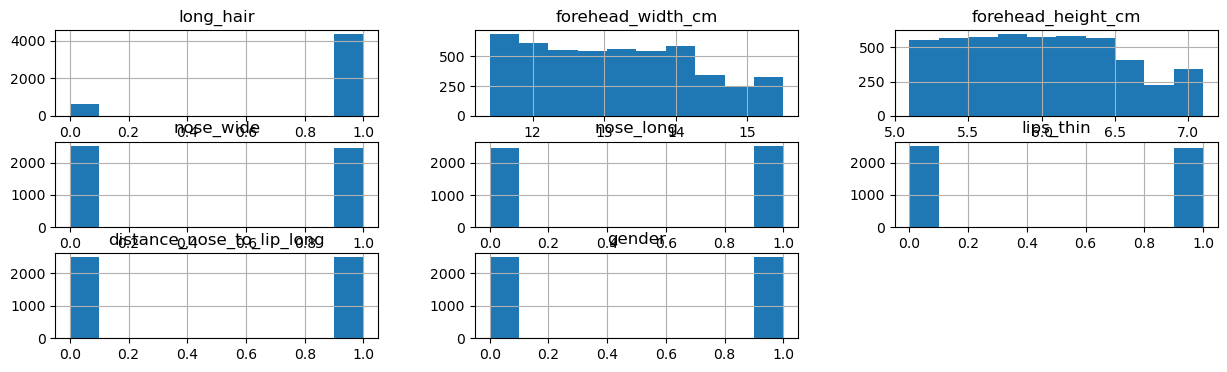

In [58]:
gender.hist(figsize=(15 , 4))

<BarContainer object of 7 artists>

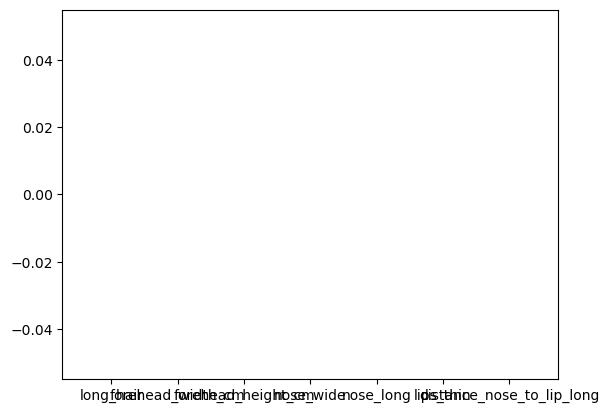

In [62]:
from sklearn.linear_model import Lasso
nume = gender.drop("gender" , axis=1).columns
lasso = Lasso(alpha = 0.2)
lasso_coef = lasso.fit(x,y).coef_
plt.bar(nume , lasso_coef)

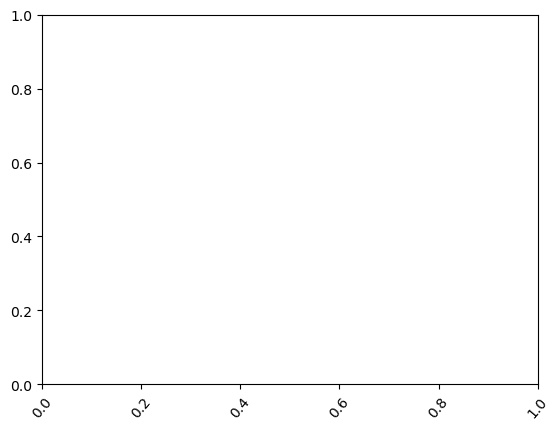

In [64]:
plt.xticks(rotation=50)
plt.show()

<Axes: >

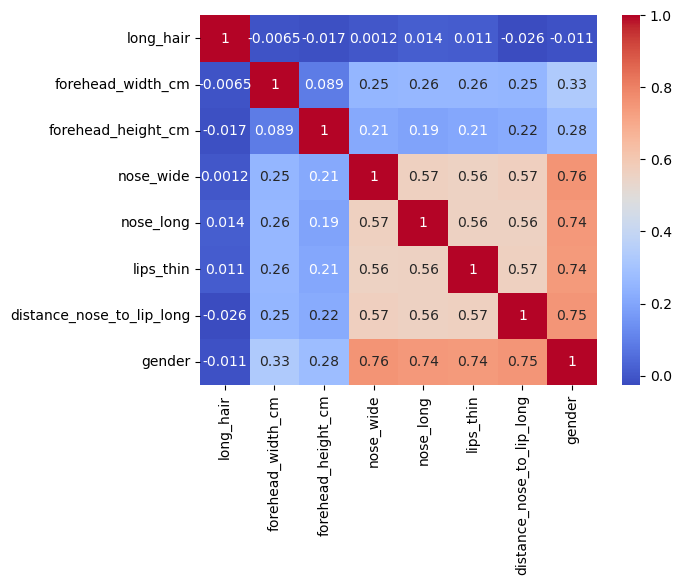

In [65]:
correlation_matrix = gender.corr()
sns.heatmap(correlation_matrix , annot = True , cmap='coolwarm')

<Axes: xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

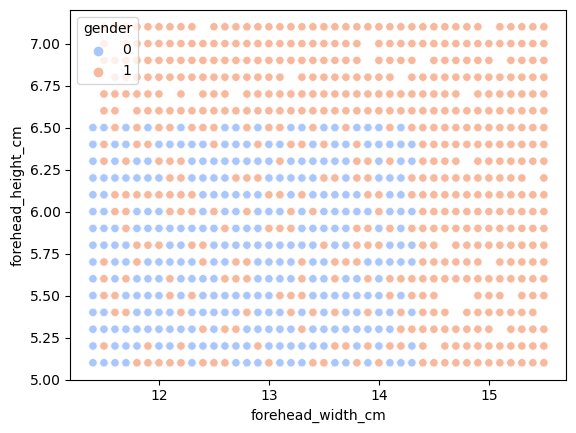

In [82]:
sns.scatterplot(x='forehead_width_cm', y='forehead_height_cm', data=gender, hue="gender", palette="coolwarm" )

In [83]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.8769063416790737

In [84]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
param_grid = {
    "n_estimators": [30, 50, 100],
    "max_features": [2, 4, 6, 8]
}
grid_search = GridSearchCV(forest , param_grid, cv=5 , scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(x_train_scaled, y_train)
best_forest = grid_search.best_estimator_
best_forest.score(x_test_scaled, y_test)

0.8860576678056513

In [86]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Change the degree as needed

# Transform the numerical features to polynomial features
polynomial_features = poly.fit_transform(gender)

# Create a DataFrame with the polynomial features
polynomial_df = pd.DataFrame(polynomial_features)

# Display the original and polynomial feature datasets
print("Original dataset:")
print(gender)

print("\nPolynomial features:")
print(polynomial_df)

Original dataset:
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  dist

In [57]:
gender = gender.astype(int)

In [58]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   long_hair                  5001 non-null   int32
 1   forehead_width_cm          5001 non-null   int32
 2   forehead_height_cm         5001 non-null   int32
 3   nose_wide                  5001 non-null   int32
 4   nose_long                  5001 non-null   int32
 5   lips_thin                  5001 non-null   int32
 6   distance_nose_to_lip_long  5001 non-null   int32
 7   gender                     5001 non-null   int32
dtypes: int32(8)
memory usage: 156.4 KB


In [62]:
input_data = (0, 10 , 5, 4 , 1, 0, 0)
input_data_as_numby_array  = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1 , -1)
prediction = reg.predict(input_data_reshape)
print("the gender is :" , prediction[0])

the gender is : 1.5795061739518552
